## Week 5 ##



This week, we will make use of the $pV$ diagram for a Carnot process of an ideal gas (Figure 1) to introduce object-oriented programming, and implement a 3D plot.

The Carnot process describes a periodically working machine that can exchange heat with two reservoirs of different temperatures and perform mechanical work. The process consists of four steps:



<br>

- **Isothermal expansion** : increase of volume with intake of heat. $$ A \rightarrow B $$

- **Adiabatic expansion**: increase of volume without heat exchange. $$ B \rightarrow C $$

- **Isothermal contraction**: decrease of volume with extraction of heat. $$ C \rightarrow D $$

- **Adiabatic contraction**: decrease of volume without heat exchange. $$ D \rightarrow A $$



<br>
<br>
<br>

The equations that govern the pressure and volume for these two types of state changes (adiabatic and isothermal) are the following:

 $$ pV = constant \tag{Equation 1. Isothermal line}$$
 
 $$ pV^\gamma = constant \tag{Equation 2. Adiabatic line}$$

 $$ pV = Nk_{b}T \tag{Equation 3. Thermal equation of state}$$


**<h1><center>Figure 1. pV diagram for a Carnot process of an ideal gas</center></h1>**

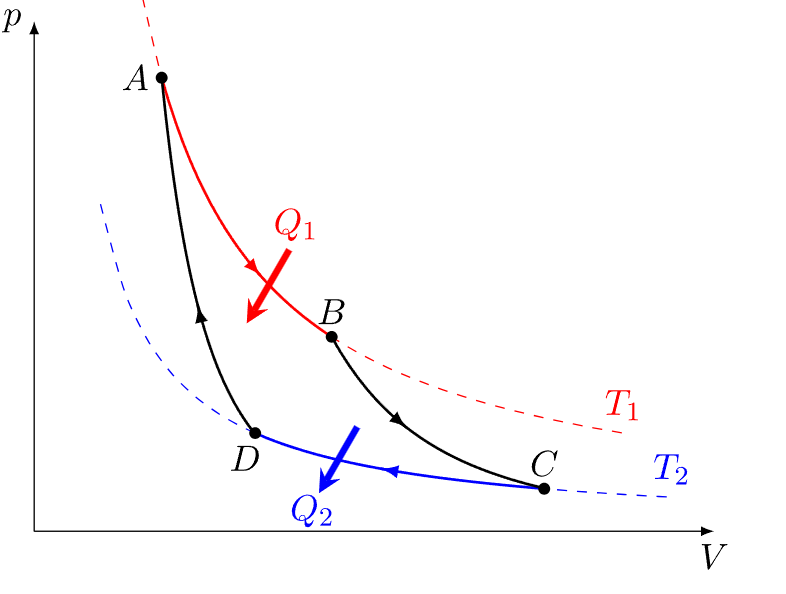

In [11]:
from IPython import display
def printmd(string):
    display.display(display.Markdown(string))
printmd("**<h1><center>Figure 1. pV diagram for a Carnot process of an ideal gas</center></h1>**")
display.Image("pv_diagram.jpeg")

### Task 1: ###

For the first task, create a class called **CarnotCycle**. Use this to instantiate (create) an **object** - the ideal gas with certain $p$ and $V$ values - and apply  the Carnot process to it.


- Define the  constructor function:
    - **\__init__(self, pressure, volume)**.
        - This function instantiates (creates) an object of the class and defines its attributes, which are: **pressure**, **volume** and **temperature**. 
        - The inputs will be **pressure** and **volume**, and the function will use the ideal gas law to calculate **temperature**, before defining all three as attributes of the object.


<br>


- Define the 5 **methods** of the class, with their respective inputs:
    - **isothermal_expansion(self, iso_factor)**:
        - Performs an isothermal expansion on an object based on the expansion factor for the isothermal state change, updating the object's attributes.
    - **adiabatic_expansion(self, adia_factor, gamma)**:
        - Performs an adiabatic expansion on an object based on the expansion factor for the adiabatic state change and gamma, updating the object's attributes.
    - **isothermal_contraction(self, iso_factor)**:
        - Performs an isothermal compression on an object based on the expansion factor for the isothermal state change, updating the object's attributes.
    - **adiabatic_contraction(self, adia_factor, gamma)**:
        - Performs an adiabatic compression on an object based on the expansion factor for the adiabatic state change and gamma, updating the object's attributes.
    - **show_state(self)**:
        - Prints out the current state of our object (the object's attributes): **temperature**, **pressure**, and **volume**.


<br>

- The first four methods in our class represent the four steps of the Carnot cycle, and take several inputs:
    - **gamma**: isentropic expansion factor.
    - **iso_factor**: This represents the factor by which the volume expands/contracts in the isothermal steps.
        - In this exercise, this factor will be the same for the isothermal expansion and contraction, meaning:
            - for the isothermal expansion ($A \rightarrow B $), we have $ V_{B}=iso\_factor * V_{A} $ 
            - for the isothermal contraction ($C \rightarrow D $), we have  $ V_{D}=\frac{1}{iso\_factor} * V_{C} $
    - **adia_factor**: This represents the factor by which the volume expands/contracts in the adiabatic steps. 
        - In this exercise, this factor will be the same for the adiabatic expansion and contraction, meaning:
            - for the adiabatic expansion ($B \rightarrow C $), we have $ V_{C}=adia\_factor * V_{B} $ 
            - for the adiabatic contraction ($D \rightarrow A $), we have  $ V_{A}=\frac{1}{adia\_factor} * V_{D} $
        
<br>

> **NOTE**: You will see that every method (function) of a class has "self" as an input. This is the object to which the method is applied. If we instantiate (create) an object of a class, whenever we apply a method of the class to the object, the object itself is automatically fed to the function as "self".

> For example: if there is an object of the CarnotCycle class called **gas1** (instantiated as **gas1 = CarnotCycle(100,100)**), we can perform an isothermal expansion (where the volume increases by a factor of 2). This is done by applying the following method: **gas1.isothermal_expansion(2)**. Here, the **isothermal_expansion** function is called, and the object on which it is being applied (**gas1**) is automatically fed to the function as **self**. Only the remaining variables need to be provided as input, in this case: **factor**.

> For a conceptual introduction to classes and general object oriented programming terminology, please visit this link: https://realpython.com/python-classes/

<br>

> **Hint**: Make use of the provided $N$ and $k_{b}$ constants.

 

In [96]:
N = 1e23
kb = 1.380649e-23

class CarnotCycle:
    def __init__(self, pressure, volume):
        self.pressure = pressure
        self.volume = volume
        self.temperature = None
        self.iso_factor = None
        self.adia_factor = None
        self.gamma = None
        
    def isothermal_expansion(self, iso_factor):
        # Computes attributes of the state B
        self.iso_factor = iso_factor
        self.pressure = self.pressure * self.volume / (iso_factor * self.volume)
        self.volume = iso_factor * self.volume
        self.temperature = self.pressure * self.volume / (N * kb)
        
    def adiabatic_expansion(self, adia_factor, gamma):
        # Computes attributes of the state C
        self.adia_factor = adia_factor
        self.gamma = gamma
        self.pressure = self.pressure * (self.volume / (adia_factor * self.volume)) ** self.gamma
        self.volume = adia_factor * self.volume
        self.temperature = self.pressure * self.volume / (N * kb)
        
    def isothermal_compression(self, iso_factor):
        # Computes attributes of the state D
        self.iso_factor = iso_factor
        self.pressure = self.pressure * self.volume / (self.volume / iso_factor)
        self.volume = self.volume / iso_factor
        self.temperature = self.pressure * self.volume / (N * kb)
        
    def adiabatic_compression(self, adia_factor,gamma):
        # Computes attributes of the state A
        self.adia_factor = adia_factor
        self.gamma = gamma
        self.pressure = self.pressure * (self.volume / (self.volume / adia_factor)) ** self.gamma
        self.volume = self.volume / adia_factor
        self.temperature = self.pressure * self.volume / (N * kb)
        
    @staticmethod
    def show_state():
        print(pressures, volumes, temperatures)

### Task 2: ###


For the second task, generate a 3D plot.

- Sweep the variable  **adia_factor** (adiabatic expansion factor) in one axis, and plot 2D slices of the $pV$ diagram using the remaining two axis.
    - Generate this for $ 1.75 \gt $ **adia_factor** $ \gt 3$ in steps of $0.01$
- You must:
    - Colour code all the points (A, B, C, and D) in the plot by temperature and include a colour bar (so that we are able to see the effect of the adiabatic expansion factor on the temperature)
    - Include the isothermic and adiabatic lines of the $pV$ diagram in black (with some opacity), that result from the given adiabatic expansion factor.

Below you can see a visual example of 2 different $pV$ diagrams for **adia_factor** $= 1.25$ and  **adia_factor** $= 3$.





> Hints:
> - fig = plt.figure(figsize=(10,10))
> - ax = fig.add_subplot(projection='3d')
> - ax.plot( ..... , alpha = 0.4)
> - ax.view_init...
> - You can set any arbitrary values for gamma and isothermal expansion factor.

**<h1><center>Figure 2. pV diagrams for a Carnot process of an ideal gas with adiabatic factor 1.25 and 3 </center></h1>**

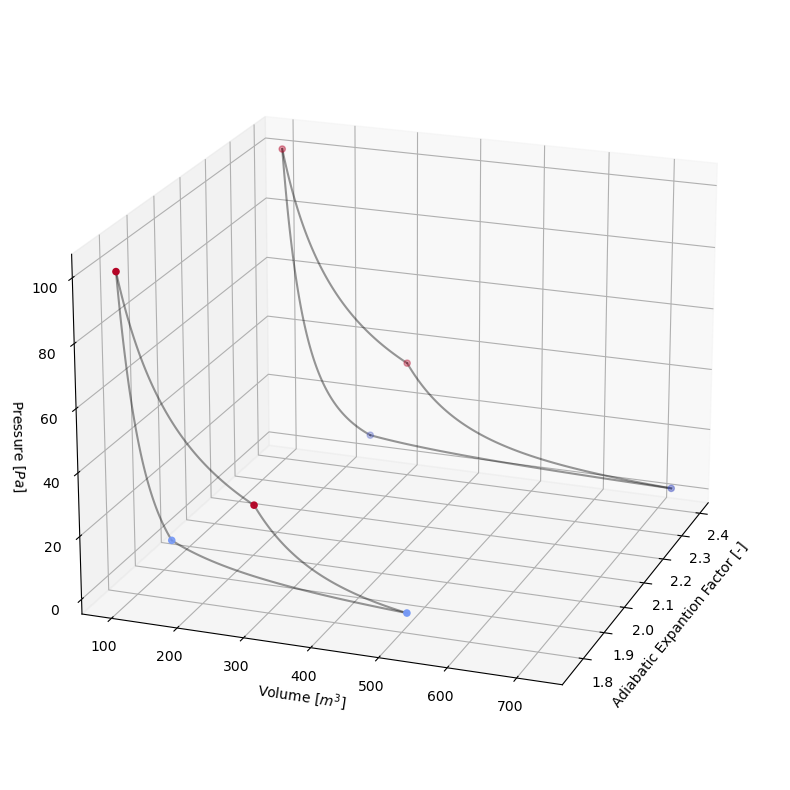

In [97]:
def printmd(string):
    display.display(display.Markdown(string))
printmd("**<h1><center>Figure 2. pV diagrams for a Carnot process of an ideal gas with adiabatic factor 1.25 and 3 </center></h1>**")
display.Image("plotting_example.png")

In [98]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

(56,) (56,)
(68,) (68,)
(80,) (80,)
(92,) (92,)
(104,) (104,)
(116,) (116,)
(128,) (128,)
(140,) (140,)
(152,) (152,)
(164,) (164,)


Text(0.5, 0.92, 'Carnot Cycle with Varying Adiabatic Factor')

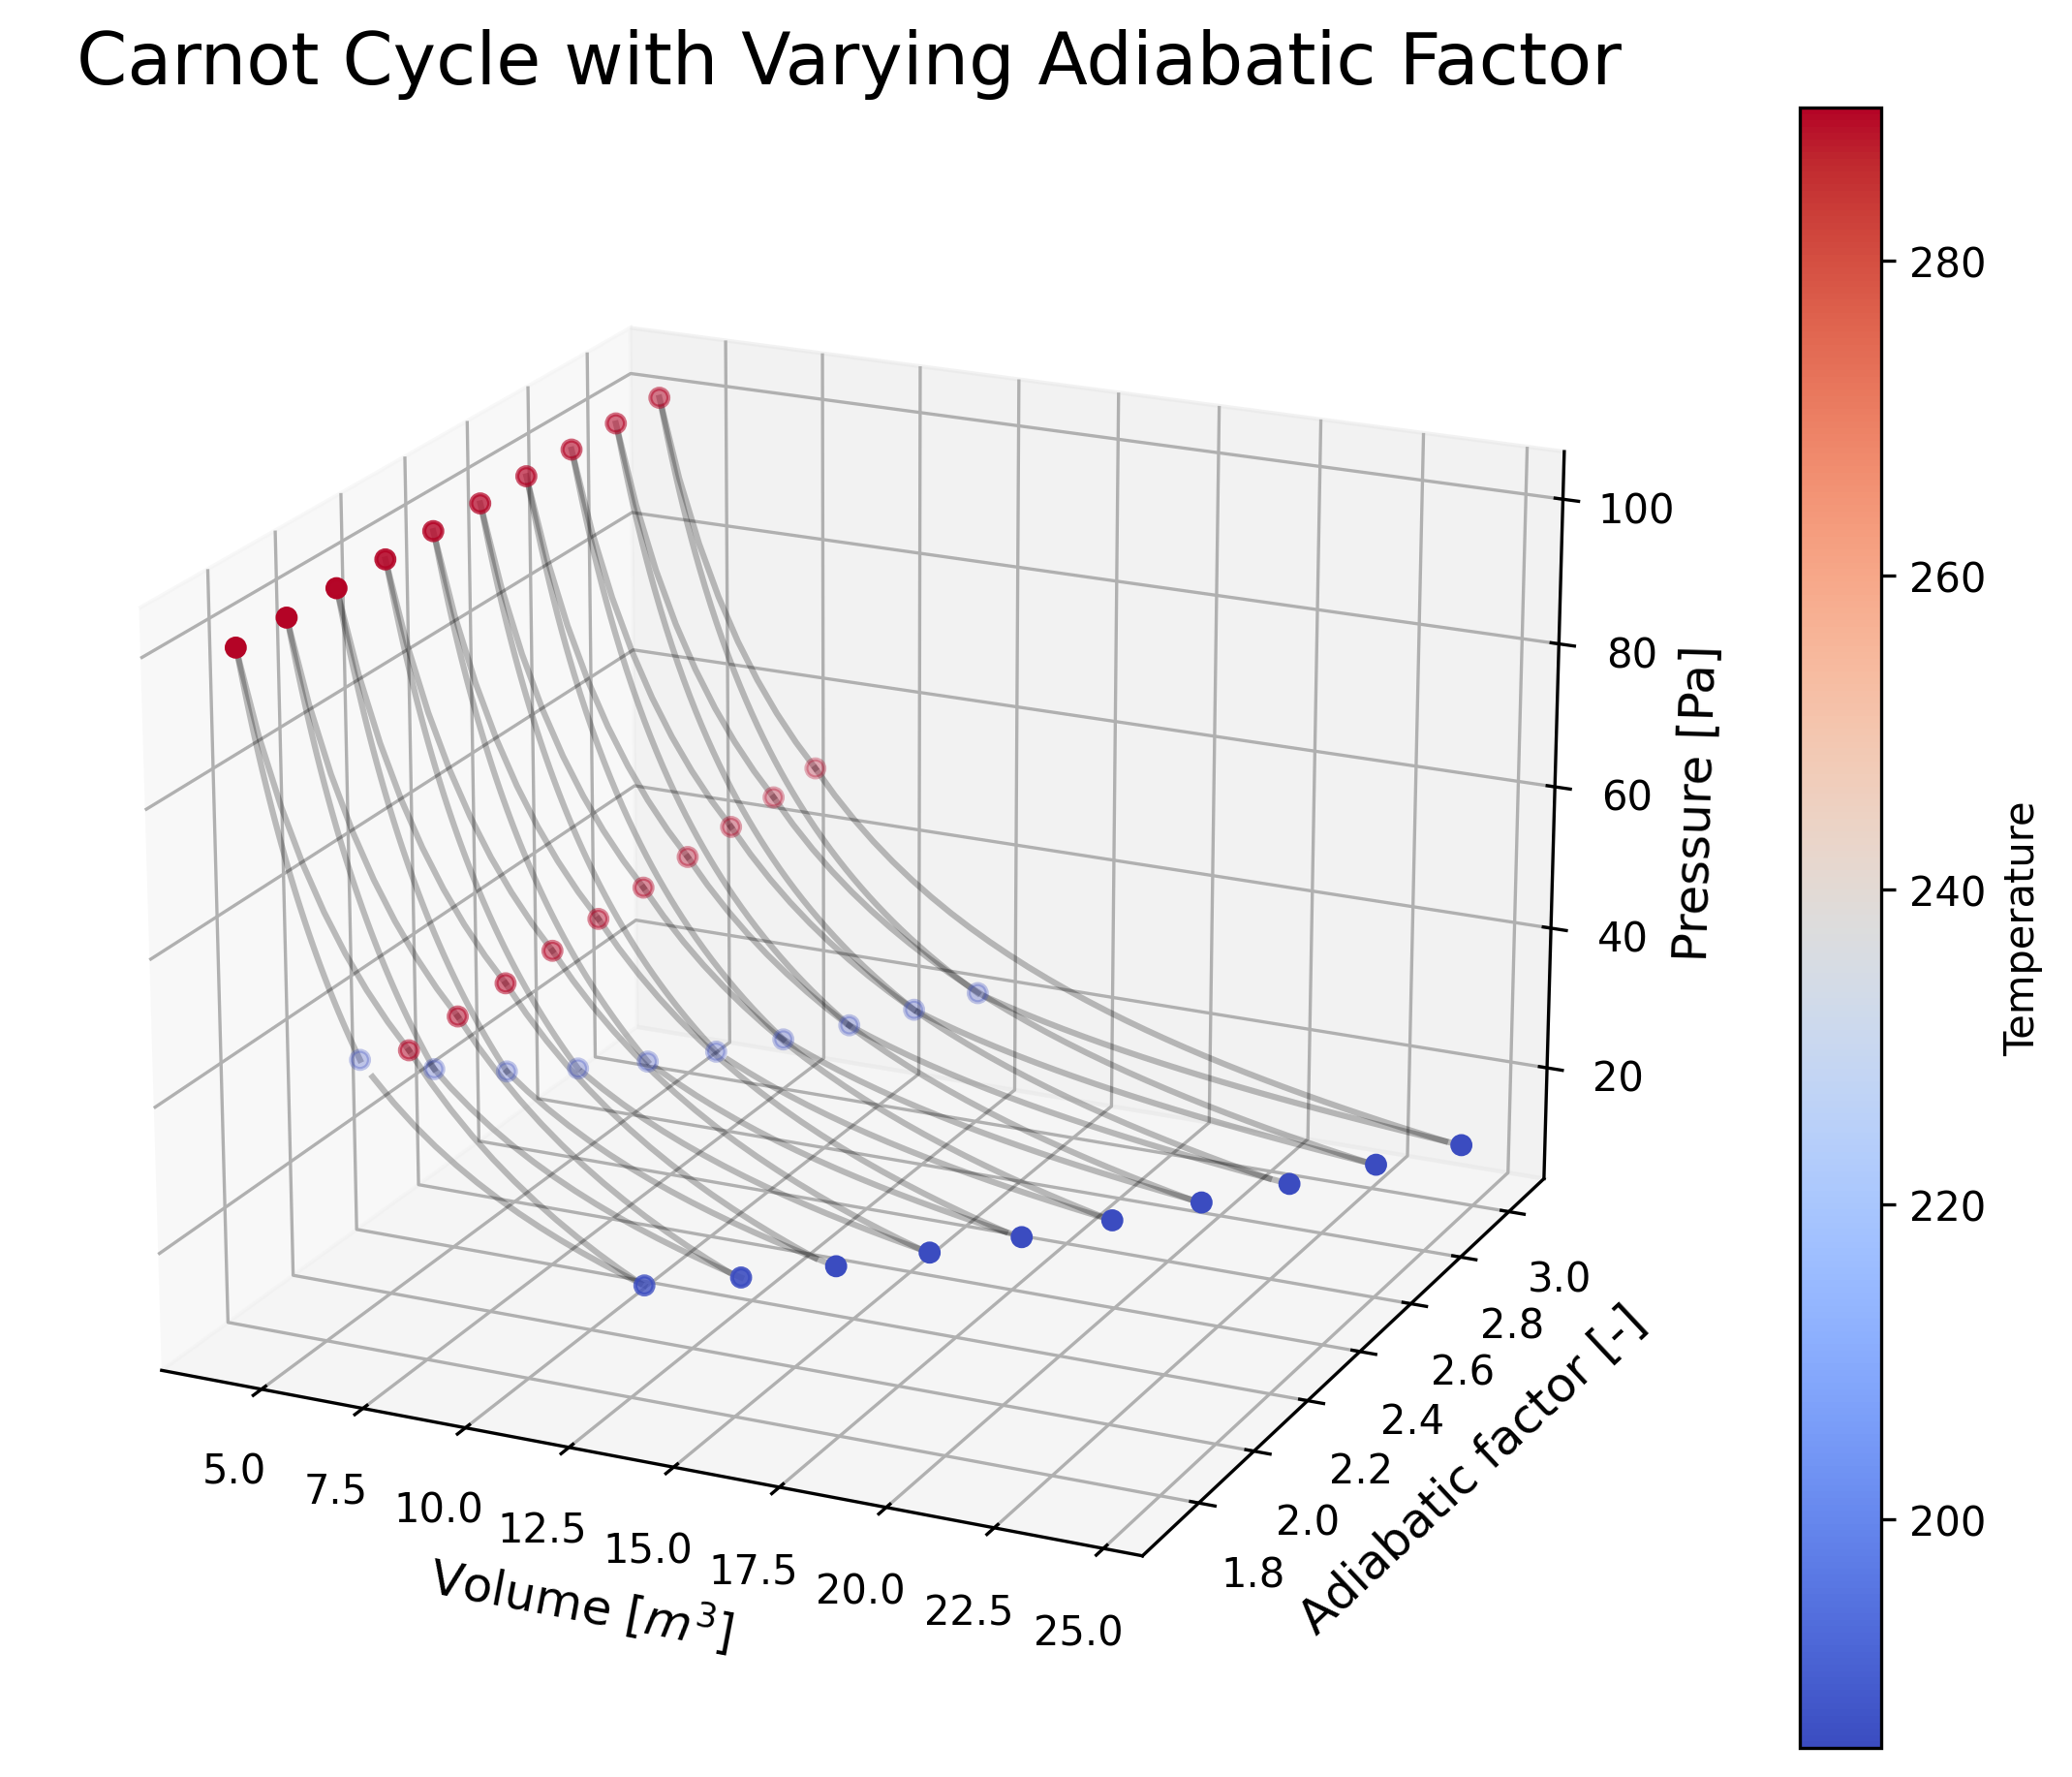

In [230]:
adia_factors = np.arange(1.7, 3.1, 0.15)

ax = plt.figure(figsize=(10,6), dpi=300, constrained_layout=True).add_subplot(projection='3d')
ax.view_init(20, -65)

for adia_factor in adia_factors:
    pressures = []
    volumes = []
    temperatures = []
    
    #  Initialize the cycle
    carnot_cycle = CarnotCycle(pressure=100, volume=4)
    
    # Isothermal expansion A -> B
    carnot_cycle.isothermal_expansion(iso_factor=2)
    temperatures.append(carnot_cycle.temperature)
    pressures.append(carnot_cycle.pressure)
    volumes.append(carnot_cycle.volume)
    
    
    # Adiabatic expansion B -> C
    carnot_cycle.adiabatic_expansion(adia_factor=adia_factor, gamma=1.4)
    temperatures.append(carnot_cycle.temperature)
    pressures.append(carnot_cycle.pressure)
    volumes.append(carnot_cycle.volume)
    
    # Isothermal compression C -> D
    carnot_cycle.isothermal_compression(iso_factor=2)
    temperatures.append(carnot_cycle.temperature)
    pressures.append(carnot_cycle.pressure)
    volumes.append(carnot_cycle.volume)
    
    # Adiabatic compression D -> A
    carnot_cycle.adiabatic_compression(adia_factor=adia_factor, gamma=1.4)
    temperatures.append(carnot_cycle.temperature)
    pressures.append(carnot_cycle.pressure)
    volumes.append(carnot_cycle.volume)
        
    # Isothermal expansion line A -> B
    t = temperatures[3]
    v = np.arange(volumes[3], volumes[0] + .5, .5)
    p = N * kb * t / v
    adia_array = np.ones(v.shape) * adia_factor # Make an array out of adiabatic factor to match the dimension
    ax.plot(v, adia_array, p, color='black', alpha=.25)
    
    # Adiabatic expansion line B -> C
    v = np.arange(volumes[0], volumes[1], .5)
    t = np.linspace(temperatures[0], temperatures[1], len(v))
    p = N * kb * t / v
    adia_array = np.ones(v.shape) * adia_factor # Make an array out of adiabatic factor to match the dimension
    ax.plot(v, adia_array, p, color='black', alpha=.25)
    
    # Isothermal compression line C -> D
    t = temperatures[1]
    v = np.arange(volumes[1], volumes[2] -.2, -.5)
    p = N * kb * t / v
    adia_array = np.ones(v.shape) * adia_factor # Make an array out of adiabatic factor to match the dimension
    ax.plot(v, adia_array, p, color='black', alpha=.25)
    
    # Adiabatic expansion line D -> A
    v = np.arange(volumes[2], volumes[3], -.05)
    t = np.linspace(temperatures[2], temperatures[3], len(v))
    print(v.shape, t.shape)
    p = N * kb * t / v
    adia_array = np.ones(v.shape) * adia_factor # Make an array out of adiabatic factor to match the dimension
    ax.plot(v, adia_array, p, color='black', alpha=.25)
    
    #ax.scatter(volumes, adia_factor, pressures)
    sc = ax.scatter(volumes, adia_factor, pressures, c=temperatures, cmap=cm.coolwarm)

cbar = fig.colorbar(sc, label='Temperature')

ax.set_xlabel('Volume [$m^3$]', labelpad=5, fontsize=12)
ax.set_ylabel('Adiabatic factor [-]', labelpad=5, fontsize=12)
ax.set_zlabel('Pressure [Pa]', labelpad=2, fontsize=12)
ax.set_title('Carnot Cycle with Varying Adiabatic Factor', fontsize=18)